<a href="https://colab.research.google.com/github/code-1-mukul/Deep-Learning-Models/blob/main/Handwritten_Digit_Classification_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

### Loading dataset and train-test-split

In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


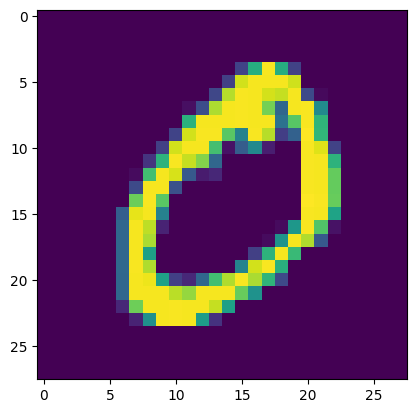

In [7]:
import matplotlib.pyplot as plt

plt.imshow(x_train[1])

#### We do /255 as all the values are between 0 to 255 of the pixels so they are in range 0 and 1 now.

In [8]:
x_train = x_train/255
x_test = x_test/255

### Developing the Neural Network

In [9]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
  )

In [12]:
model.fit(x_train,y_train,epochs=20,validation_split=0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8614 - loss: 0.4863 - val_accuracy: 0.9548 - val_loss: 0.1574
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9599 - loss: 0.1385 - val_accuracy: 0.9623 - val_loss: 0.1234
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9756 - loss: 0.0831 - val_accuracy: 0.9681 - val_loss: 0.1021
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9821 - loss: 0.0630 - val_accuracy: 0.9725 - val_loss: 0.0921
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9860 - loss: 0.0458 - val_accuracy: 0.9732 - val_loss: 0.0895
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9895 - loss: 0.0359 - val_accuracy: 0.9757 - val_loss: 0.0851
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9913 - loss: 0.0291 - val_accuracy: 0.9733 - val_loss: 0.0854
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9933 - loss: 0.0226 

In [14]:
# softmax returns probability for every digit , like what is probability for each row being 0,1,2,3,4,5,6 and so on
y_prob = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [15]:
# axis=1 means column , so values that has highest probability across all columns of a row
y_pred = y_prob.argmax(axis=1)

In [16]:
from sklearn.metrics import accuracy_score

print('Accuracy is: ',accuracy_score(y_test,y_pred))

Accuracy is:  0.9752


### Lets Just Check Our Model

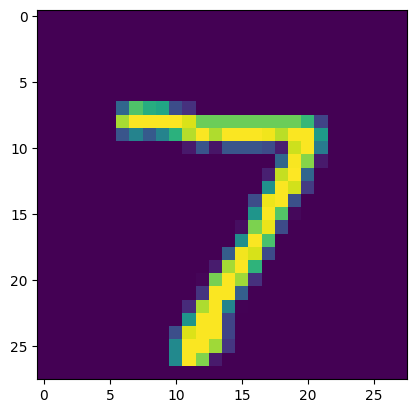

In [19]:
plt.imshow(x_test[0])

In [23]:
model.predict(x_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([7])